# 미니 프로젝트 : 가위바위보 분류기를 만들자

## 라이브러리 import

In [16]:
import tensorflow as tf
import numpy as np

print(tf.__version__)
print(np.__version__)

2.6.0
1.22.2


## 데이터 불러오기 + Resize 하기

💡 숫자 손글씨의 경우 이미지 크기가 28x28 이었기 때문에, 우리의 가위, 바위, 보 이미지도 28x28로 만들어야 합니다. 

이를 위해서는 PIL 라이브러리를 사용해볼 거예요. 그러려면 먼저 라이브러리를 불러와야 겠죠?

In [17]:
from PIL import Image 
import glob
import os

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


💡 이제 가위,바위,보 이미지를 불러와서 28x28 사이즈로 변경할 겁니다

In [21]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(64,64)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

1117  images to be resized.
1117  images resized.
가위 이미지 resize 완료!


In [22]:
# 바위

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock/rock"

resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

1288  images to be resized.
1288  images resized.
바위 이미지 resize 완료!


In [23]:
# 보

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

1271  images to be resized.
1271  images resized.
보 이미지 resize 완료!


💡load_data() 함수는 입력으로 이미지가 있는 폴더 위치를 받습니다. 

여기서는 rock_scissor_paper 폴더 위치를 적어주면 됩니다. 

가위바위보의 경우 3개의 클래스 즉, 가위: 0, 바위: 1, 보: 2 로 라벨링이 될 것입니다.

In [27]:
import numpy as np

def load_data(img_path, number_of_data=3676):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=64
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 3676 입니다.
x_train shape: (3676, 64, 64, 3)
y_train shape: (3676,)


라벨:  0


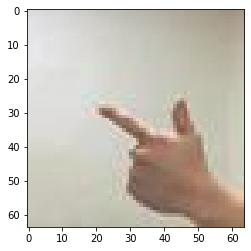

In [28]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0])
print('라벨: ', y_train[0])

## 딥러닝 네트워크 설계하기

In [31]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# model을 직접 만들어 보세요.
# Hint! model의 입력/출력부에 특히 유의해 주세요. 가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요?
# 아래의 하이퍼파라미터는 예시입니다. 높은 인식률을 얻기 위해 하이퍼파라미터를 수정해 보세요. 
n_channel_1=32
n_channel_2=64
n_dense=32
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(64,64,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                401440    
_________________________________________________________________
dense_5 (Dense)              (None, 3)                

## 딥러닝 네트워크 학습시키기


In [32]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train, y_train, epochs=n_train_epoch)

Epoch 1/10
115/115 [==============================] - 25s 213ms/step - loss: 5.8888 - accuracy: 0.7867
Epoch 2/10
115/115 [==============================] - 25s 220ms/step - loss: 0.0722 - accuracy: 0.9758
Epoch 3/10
115/115 [==============================] - 26s 222ms/step - loss: 0.0713 - accuracy: 0.9791
Epoch 4/10
115/115 [==============================] - 26s 225ms/step - loss: 0.0923 - accuracy: 0.9668
Epoch 5/10
115/115 [==============================] - 26s 228ms/step - loss: 0.0463 - accuracy: 0.9867
Epoch 6/10
115/115 [==============================] - 28s 240ms/step - loss: 0.0032 - accuracy: 0.9995
Epoch 7/10
115/115 [==============================] - 26s 227ms/step - loss: 3.4845e-04 - accuracy: 1.0000
Epoch 8/10
115/115 [==============================] - 25s 222ms/step - loss: 1.7633e-04 - accuracy: 1.0000
Epoch 9/10
115/115 [==============================] - 26s 224ms/step - loss: 1.2301e-04 - accuracy: 1.0000
Epoch 10/10
115/115 [==============================] - 26s 22

In [35]:
# model training
history = model.fit(
    x_train,
    y_train,
    # validation_data=(x_test, y_test),
    epochs=n_train_epoch,
    batch_size = 300,
)

Epoch 1/10
13/13 [==============================] - 30s 2s/step - loss: 7.9360e-05 - accuracy: 1.0000
Epoch 2/10
13/13 [==============================] - 29s 2s/step - loss: 7.7279e-05 - accuracy: 1.0000
Epoch 3/10
13/13 [==============================] - 29s 2s/step - loss: 7.5523e-05 - accuracy: 1.0000
Epoch 4/10
13/13 [==============================] - 29s 2s/step - loss: 7.3537e-05 - accuracy: 1.0000
Epoch 5/10
13/13 [==============================] - 29s 2s/step - loss: 7.1813e-05 - accuracy: 1.0000
Epoch 6/10
13/13 [==============================] - 29s 2s/step - loss: 7.0232e-05 - accuracy: 1.0000
Epoch 7/10
13/13 [==============================] - 29s 2s/step - loss: 6.8716e-05 - accuracy: 1.0000
Epoch 8/10
13/13 [==============================] - 29s 2s/step - loss: 6.7251e-05 - accuracy: 1.0000
Epoch 9/10
13/13 [==============================] - 29s 2s/step - loss: 6.5911e-05 - accuracy: 1.0000
Epoch 10/10
13/13 [==============================] - 29s 2s/step - loss: 6.4532e-0

Text(0, 0.5, 'Accuracy')

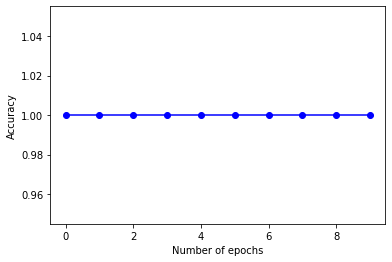

In [36]:
epochs_ = range(0, n_train_epoch)  # number of epochs  
accuracy_train = history.history['accuracy']  ##getting  accuracy of each epochs

plt.plot(epochs_, accuracy_train, label='Training accuracy', color='blue', marker = 'o')
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Loss')

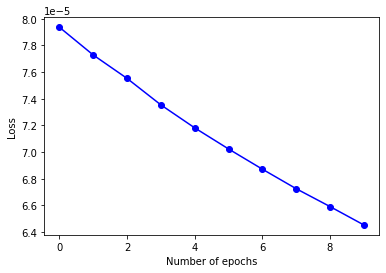

In [37]:
epochs_ = range(0, n_train_epoch)  # number of epochs  
loss_train = history.history['loss']    ##getting  loss of each epochs

plt.plot(epochs_, loss_train, label='training loss', color='blue', marker = 'o')
plt.xlabel('Number of epochs')
plt.ylabel('Loss')

# 얼마나 잘 만들었는지 확인하기(테스트)


💡 테스트용 데이터인 x_test, y_test를 만들어 봅시다

In [33]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/scissor/scissor"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock/rock"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/paper/paper"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"

(x_test, y_test)=load_data(image_dir_path, number_of_data=1133)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화
print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

206  images to be resized.
206  images resized.
205  images to be resized.
205  images resized.
214  images to be resized.
214  images resized.
학습데이터(x_train)의 이미지 개수는 625 입니다.
x_test shape: (1133, 64, 64, 3)
y_test shape: (1133,)


💡 테스트용 데이터가 준비되었으니, 위에서 훈련시킨 model을 사용하여 test_accuracy를 측정해 봅시다.

In [34]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

36/36 - 2s - loss: 2.2456 - accuracy: 0.6840
test_loss: 2.245560646057129 
test_accuracy: 0.6840246915817261


# 회고
프로젝트 최종 결과 : 이미지 사이즈를 64X64로 설정하고, 각 parameter들을 'n_channel_1=32, n_channel_2=64, n_dense=32, n_train_epoch=10'로 설정하였다. 다른 조의 한분의 데이터를 가져와 테스트 데이터로서 모델을 적용시켜본 결과, 최종적으로 68%의 정확도가 나왔다.

잘한 점: 많은 파라미터를 적용시켜보고 시행착오를 겪으면서 최고의 점수를 내기 위해서 노력했다.

못한 점: 각 파라미터의 역할이나 영향력에 대해 정확히 알지 못한 상태에서 실험하듯이, 여러번 parameter를 바꾸어가며 노드를 진행하였다. 제대로 이해하고 필요에 따라 parameter를 바꾸어 본 것이 아니라 무작위로 좋은 값을 찾기 위해서 노력한것 같아 아쉽다.

앞으로 발전할 점: 각 parameter의 역할이나, 딥러닝의 원리를 제대로 이해한 후 같은 상황이 발생했을때, 더욱 효율적으로 최적의 parameter값을 찾을 수 있도록 이론 공부가 더 필요하다.